# Text Cleaning

### Helper Functions

I did a good bit of consolidation into categories here:

* **Mood Disorder** includes Depression and Seasonal Affective Disorder  
* **Pervasive Developmental Disorder** includes Autism and Aspergers  
* **Dissociative Disorder** includes Depersonalization Disorder 
* **Personality Disorder** includes Schizotypal Personality Disorder

In [165]:
import re
import pandas as pd

def cleanDisorders(disorder):
    disorder = re.sub("[\(\[].*?[\)\]]", "", str(disorder))
    disorder = disorder.rstrip()
    if disorder == 'Attention Deficit Hyperactivity Disorder':
        return 'ADHD'
    elif disorder == 'Post-traumatic Stress Disorder':
        return "PTSD"
    elif disorder == 'Obsessive-Compulsive Disorder':
        return "OCD"
    elif disorder == 'Anxiety Disorder':
        return "Anxiety"
    elif disorder == 'Autism' or disorder.lower() == 'autism spectrum disorder' or disorder == 'Asperges' or disorder == 'PDD-NOS':
        return 'Pervasive Developmental Disorder'
    elif disorder == 'Depression' or disorder == 'Seasonal Affective Disorder':
        return "Mood Disorder"
    elif disorder == 'Addictive Disorder' or disorder == 'Substance Use Disorder':
        return "Addiction or Substance Use"
    elif disorder.lower() == 'depersonalization disorder':
        return "Dissociative Disorder"
    elif disorder == 'Schizotypal Personality Disorder':
        return "Personality Disorder"
    else:
        return disorder
    
def loadData(filename):
    df = pd.read_csv(filename)
    print('\nShape:')
    print(df.shape)
    return df

def cleanAndGetCounts(df, qID, cleanFn):
    df[qID] = df[qID].apply(cleanFn)
    valCounts = df[qID].value_counts()
    valCounts = valCounts.iloc[1:]
    print(valCounts)
    return valCounts

### 2016 Diagnosed Mental Health Conditions

In [166]:
df2016 = loadData('data/QA_2016.T.csv')
valCounts = cleanAndGetCounts(df2016, '115', cleanDisorders)


Shape:
(4760, 61)
Mood Disorder                                                                                               775
Anxiety                                                                                                     648
ADHD                                                                                                        224
Addiction or Substance Use                                                                                  163
PTSD                                                                                                        141
Stress Response Syndromes                                                                                   104
Personality Disorder                                                                                         91
OCD                                                                                                          68
Eating Disorder                                                                      

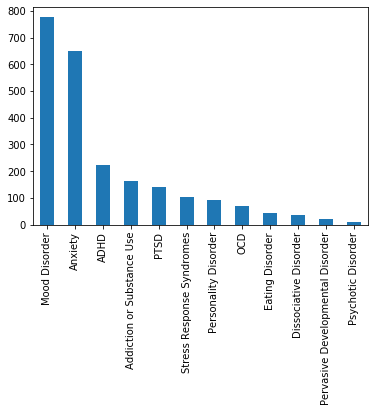

In [167]:
valCounts.sort_values(ascending=False).head(12).plot(kind='bar')

### 2016 Undiagnosed Mental Health Conditions

In [168]:
df16 = loadData('data/QA_2016.T.csv')
valCts = cleanAndGetCounts(df16, '116', cleanDisorders)


Shape:
(4760, 61)
Mood Disorder                       442
Anxiety                             389
ADHD                                132
Stress Response Syndromes           100
Personality Disorder                 90
Addiction or Substance Use           82
PTSD                                 56
OCD                                  52
Dissociative Disorder                24
Eating Disorder                      19
Psychotic Disorder                   18
Gender Identity Disorder              4
Asperger Syndrome                     3
Burnout                               3
Depersonalisation                     2
post-partum / anxiety                 2
We're all hurt, right?!               1
Tinnitus                              1
Pervasive Developmental Disorder      1
Suicidal Ideation                     1
Asperger's                            1
Name: 116, dtype: int64


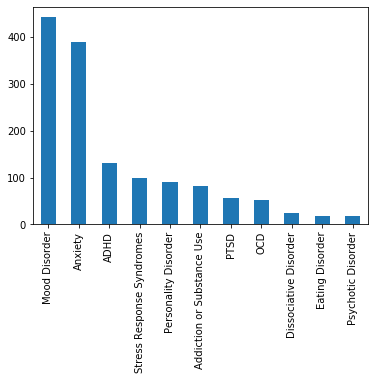

In [169]:
valCts.sort_values(ascending=False).head(11).plot(kind='bar')